<a href="https://colab.research.google.com/github/tejaswishetty17/Machine-Leaning/blob/main/AirBnb_in_London_DecisionTreeRegressor_and_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Price of Airbnb Objects and Clustering the Offers

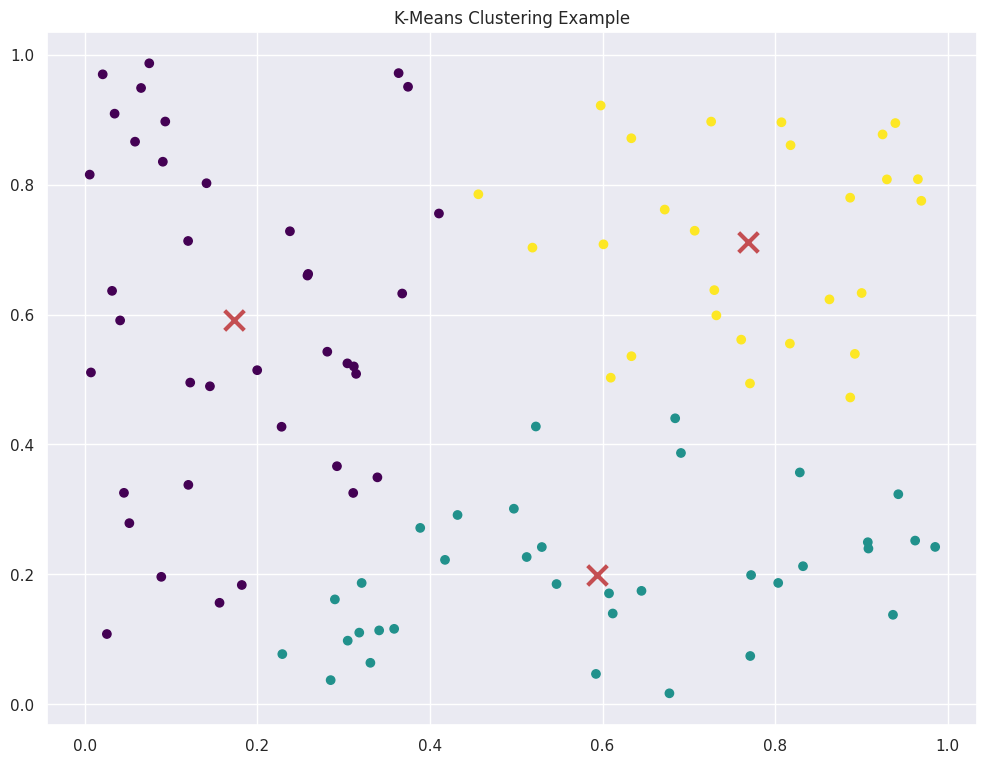

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)
X = np.random.rand(100,2)

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, linewidth=3, color='r')
plt.title('K-Means Clustering Example')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


sns.set(rc = {'figure.figsize':(12, 9)})
pd.options.mode.chained_assignment = None

In [ ]:
data = pd.read_csv('listings.csv')
data.head()

index     id                                               name  host_id  \
0      0  13913                Holiday London DB Room Let-on going    54730   
1      1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2      2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3      3  24328  Battersea bedroom & office w parking shared ga...    41759   
4      4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

  host_name  neighbourhood_group           neighbourhood  latitude  longitude  \
0     Alina                  NaN               Islington  51.56802   -0.11121   
1  Philippa                  NaN  Kensington and Chelsea  51.48796   -0.16898   
2       Liz                  NaN             Westminster  51.52098   -0.14002   
3       Joe                  NaN              Wandsworth  51.47298   -0.16376   
4    Amanda                  NaN              Wandsworth  51.44687   -0.21874   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     65               1                 16  2019-06-10   
1  Entire home/apt    100               3                 85  2019-05-05   
2  Entire home/apt    300               3                 41  2019-06-19   
3  Entire home/apt    175              30                 93  2019-06-08   
4  Entire home/apt     65               4                 28  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.15                               3               347  
1               0.73                               1               203  
2               0.41                              14               269  
3               0.88                               1               329  
4               0.69                               1                 2

In [ ]:
def do_basic_overview(data):
  print()
  print(12*'=', 'Basic Info', 12*'=')
  data.info()
  print('\n\n')
  print(12*'=', 'First Five Rows', 12*'=')
  display(data.head())
  print('\n\n')
  print(12*'=', 'Last Five Rows', 12*'=')
  display(data.tail())
  print('\n\n')
  print(12*'=', 'Duplicates', 12*'=')
  print()
  if data.duplicated().sum()>0:
    print(f'Amount of duplicated rows:{data.duplicated().sum()}.')
    data.drop_duplicates(inplace=True, ignore_index=True)
    print('Duplicated rows were dropped.')
  else:
    print('None.')

def numeric_cols_hist(data, width, height):
  cols = data.select_dtypes(include=('number')).columns.to_list()
  data[cols].hist(bins=30, figsize=(width, height))
  plt.show()
  print('Here, density of values in each numeric column is shown.')


In [ ]:
do_basic_overview(data)


============ Basic Info ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83850 entries, 0 to 83849
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           83850 non-null  int64  
 1   id                              83850 non-null  int64  
 2   name                            83823 non-null  object 
 3   host_id                         83850 non-null  int64  
 4   host_name                       83803 non-null  object 
 5   neighbourhood_group             0 non-null      float64
 6   neighbourhood                   83850 non-null  object 
 7   latitude                        83850 non-null  float64
 8   longitude                       83850 non-null  float64
 9   room_type                       83850 non-null  object 
 10  price                           83850 non-null  int64  
 11  minimum_nights                  83850 non-null  int64  

index     id                                               name  host_id  \
0      0  13913                Holiday London DB Room Let-on going    54730   
1      1  15400                Bright Chelsea  Apartment. Chelsea!    60302   
2      2  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
3      3  24328  Battersea bedroom & office w parking shared ga...    41759   
4      4  25023      All-comforts 2-bed flat near Wimbledon tennis   102813   

  host_name  neighbourhood_group           neighbourhood  latitude  longitude  \
0     Alina                  NaN               Islington  51.56802   -0.11121   
1  Philippa                  NaN  Kensington and Chelsea  51.48796   -0.16898   
2       Liz                  NaN             Westminster  51.52098   -0.14002   
3       Joe                  NaN              Wandsworth  51.47298   -0.16376   
4    Amanda                  NaN              Wandsworth  51.44687   -0.21874   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     65               1                 16  2019-06-10   
1  Entire home/apt    100               3                 85  2019-05-05   
2  Entire home/apt    300               3                 41  2019-06-19   
3  Entire home/apt    175              30                 93  2019-06-08   
4  Entire home/apt     65               4                 28  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.15                               3               347  
1               0.73                               1               203  
2               0.41                              14               269  
3               0.88                               1               329  
4               0.69                               1                 2




============ Last Five Rows ============


index        id                                   name   host_id  \
83845  83845  36583878                    7 VH Loft Apartment  90770681   
83846  83846  36584535      Lambs Passage 1 Bedroom Apartment  47609036   
83847  83847  36585425   1 Bedroom Apartment in Lambs Passage  47609036   
83848  83848  36585645                Lambs Passage 1 Bedroom  47609036   
83849  83849  36585818  1 Bedroom Apartment in Lanterns Court  47609036   

      host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
83845      Sara                  NaN    Westminster  51.53057   -0.18423   
83846       Ben                  NaN      Islington  51.52301   -0.08979   
83847       Ben                  NaN      Islington  51.52301   -0.08979   
83848       Ben                  NaN      Islington  51.52301   -0.08979   
83849       Ben                  NaN  Tower Hamlets  51.51050   -0.01788   

             room_type  price  minimum_nights  number_of_reviews last_review  \
83845  Entire home/apt    100               2                  0         NaN   
83846  Entire home/apt     82              14                  0         NaN   
83847  Entire home/apt     78              21                  0         NaN   
83848  Entire home/apt     82              21                  0         NaN   
83849  Entire home/apt     72              14                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
83845                NaN                               1               209  
83846                NaN                              18                35  
83847                NaN                              18                36  
83848                NaN                              18                36  
83849                NaN                              18                31




============ Duplicates ============

None.


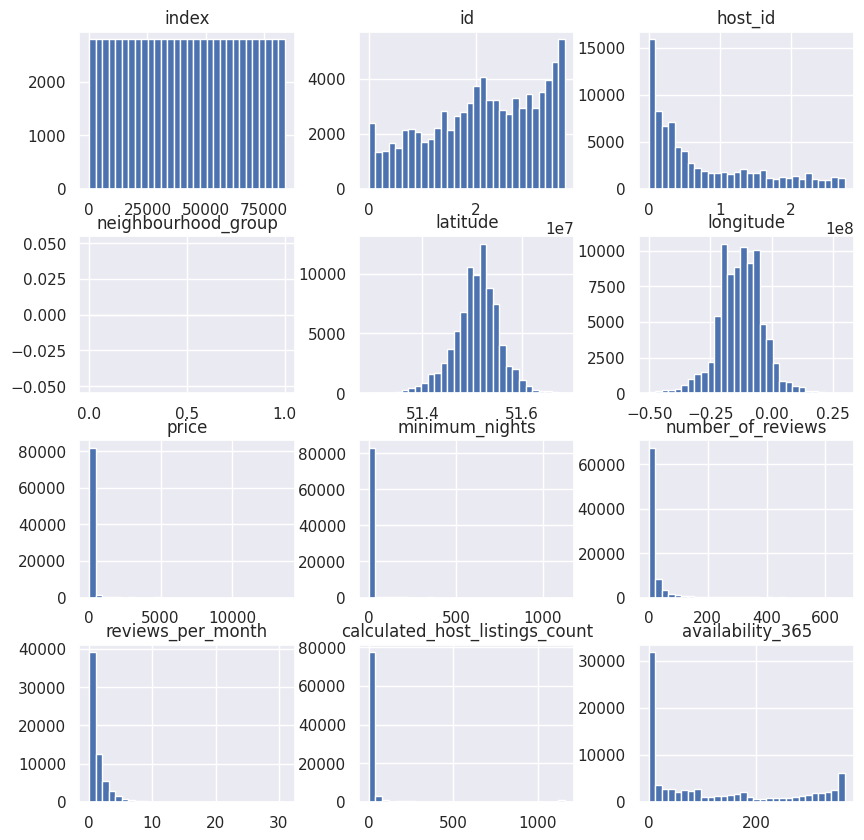

Here, density of values in each numeric column is shown.


In [ ]:
numeric_cols_hist(data, 10, 10)

In [ ]:
data = data.drop('index', axis = 1)

In [ ]:
data.describe().T

count          mean           std  \
id                              83850.0  2.134820e+07  1.028356e+07   
host_id                         83850.0  7.822874e+07  7.823495e+07   
neighbourhood_group                 0.0           NaN           NaN   
latitude                        83850.0  5.150950e+01  4.623822e-02   
longitude                       83850.0 -1.283892e-01  9.223084e-02   
price                           83850.0  1.216563e+02  2.249002e+02   
minimum_nights                  83850.0  4.201956e+00  1.607044e+01   
number_of_reviews               83850.0  1.648432e+01  3.489266e+01   
reviews_per_month               62827.0  1.208366e+00  1.416845e+00   
calculated_host_listings_count  83850.0  2.559950e+01  1.372406e+02   
availability_365                83850.0  1.163278e+02  1.324033e+02   

                                        min           25%           50%  \
id                              13913.00000  1.364932e+07  2.200927e+07   
host_id                          2010.00000  1.451736e+07  4.451248e+07   
neighbourhood_group                     NaN           NaN           NaN   
latitude                           51.29272  5.148524e+01  5.151397e+01   
longitude                          -0.50130 -1.883900e-01 -1.258100e-01   
price                               0.00000  4.500000e+01  8.100000e+01   
minimum_nights                      1.00000  1.000000e+00  2.000000e+00   
number_of_reviews                   0.00000  0.000000e+00  4.000000e+00   
reviews_per_month                   0.00000  2.400000e-01  7.400000e-01   
calculated_host_listings_count      1.00000  1.000000e+00  1.000000e+00   
availability_365                    0.00000  0.000000e+00  5.500000e+01   

                                         75%           max  
id                              3.031554e+07  3.658582e+07  
host_id                         1.325813e+08  2.749791e+08  
neighbourhood_group                      NaN           NaN  
latitude                        5.153740e+01  5.168657e+01  
longitude                      -7.037000e-02  2.965700e-01  
price                           1.400000e+02  1.370000e+04  
minimum_nights                  3.000000e+00  1.125000e+03  
number_of_reviews               1.700000e+01  6.650000e+02  
reviews_per_month               1.640000e+00  3.093000e+01  
calculated_host_listings_count  4.000000e+00  1.161000e+03  
availability_365                2.290000e+02  3.650000e+02

In [ ]:
print('Entries without the date of the last review:')
print(f'{round(data.last_review.isna().sum()/len(data)*100, 2)}%m')

Entries without the date of the last review:
25.07%m


In [ ]:
data.loc[:, 'last_review'] = pd.to_datetime(data.last_review)
display(data.last_review.head())

0    2019-06-10 00:00:00
1    2019-05-05 00:00:00
2    2019-06-19 00:00:00
3    2019-06-08 00:00:00
4    2019-06-22 00:00:00
Name: last_review, dtype: object

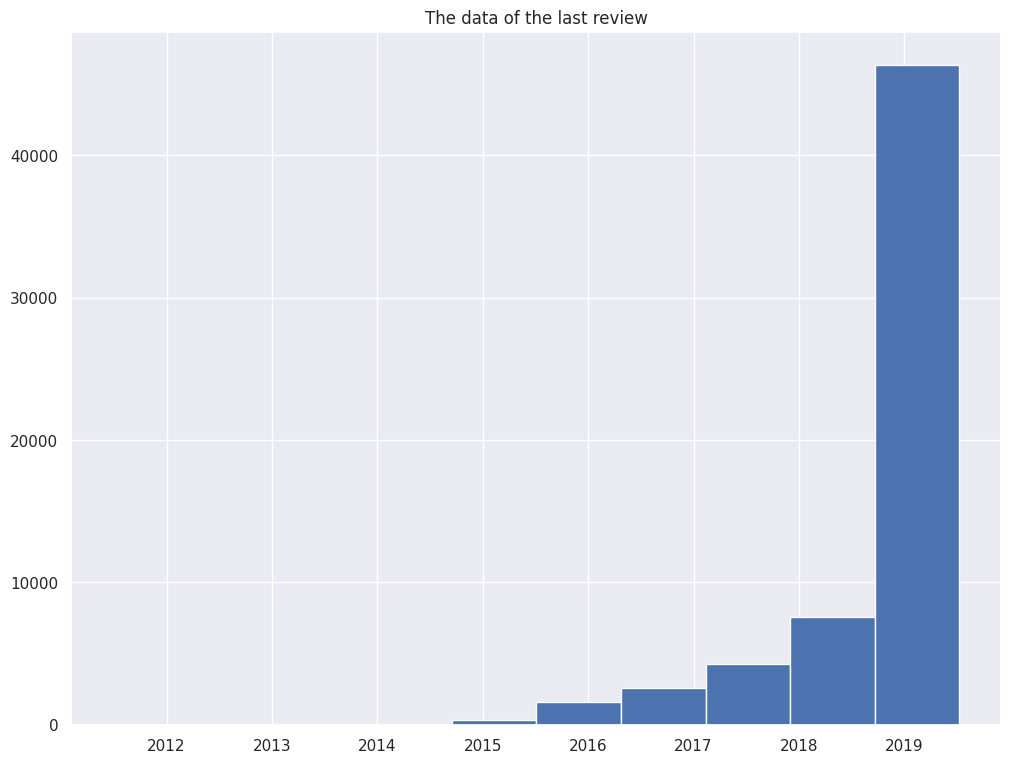

In [ ]:
data.last_review.hist()
plt.title('The data of the last review')
plt.show()

In [ ]:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
print(f'The most ancient review:\n{data.last_review.min()}')
print(f'The most recent review:\n{data.last_review.max()}')

The most ancient review:
2011-07-02 00:00:00
The most recent review:
2019-07-11 00:00:00


In [ ]:
print('Reviews made before:')
for this_year in range(2011, 2020):
  before_this_year = data.loc[data.last_review < pd.to_datetime(f'{this_year}-01-01')]
  print(f'-{this_year}:{round((len(before_this_year)/len(data))*100, 2)}%')

Reviews made before:
-2011:0.0%
-2012:0.0%
-2013:0.03%
-2014:0.08%
-2015:0.25%
-2016:1.77%
-2017:5.06%
-2018:11.15%
-2019:25.0%


In [ ]:
data = data.loc[(data.last_review >= pd.to_datetime('2019-01-01') )]

In [ ]:
print('Entries without the data of the last review:')
print(f'{(data.last_review.isna().sum()/len(data))*100}%')

Entries without the data of the last review:
0.0%


In [ ]:
print(f'The most ancient review:\n{data.last_review.min()}')
print(f'The most recent review:\n{data.last_review.max()}')

The most ancient review:
2019-01-01 00:00:00
The most recent review:
2019-07-11 00:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41867 entries, 0 to 83727
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              41867 non-null  int64         
 1   name                            41866 non-null  object        
 2   host_id                         41867 non-null  int64         
 3   host_name                       41848 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   41867 non-null  object        
 6   latitude                        41867 non-null  float64       
 7   longitude                       41867 non-null  float64       
 8   room_type                       41867 non-null  object        
 9   price                           41867 non-null  int64         
 10  minimum_nights                  41867 non-null  int64         
 11  number_

In [ ]:
data.isna().sum()

id                                    0
name                                  1
host_id                               0
host_name                            19
neighbourhood_group               41867
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
data = data.dropna(axis=1)
data.isna().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data['room_type_category'] = np.nan
i = 0
for item in data.groupby('room_type').price.median().sort_values(ascending = False).index:
  data.loc[data['room_type'] == item, 'room_type_category']=i
  print(f'-{i} - {item}')
  i +=1

data['room_type_category'] = data['room_type_category'].astype('int')
data[['room_type', 'room_type_category']].head()

-0 - Entire home/apt
-1 - Private room
-2 - Shared room


room_type  room_type_category
0     Private room                   1
1  Entire home/apt                   0
2  Entire home/apt                   0
3  Entire home/apt                   0
4  Entire home/apt                   0

In [ ]:
neighborhood_by_price = (data
                         .groupby('neighbourhood').agg(median_price = ('price', 'median'))
                         .sort_values(by='median_price', ascending = False)
                         ).index.to_list()

data['neighbourhood_category'] = np.nan
i=0
for item in neighborhood_by_price:
  print(f'- {i} - {item}')
  data.loc[data['neighbourhood'] == item, 'neighbourhood_category'] = i
  i+=1

data['neighbourhood_category'] = data['neighbourhood_category'].astype('int')
data[['neighbourhood', 'neighbourhood_category']].head()

- 0 - City of London
- 1 - Kensington and Chelsea
- 2 - Westminster
- 3 - Camden
- 4 - Hammersmith and Fulham
- 5 - Islington
- 6 - Wandsworth
- 7 - Southwark
- 8 - Hackney
- 9 - Tower Hamlets
- 10 - Richmond upon Thames
- 11 - Lambeth
- 12 - Greenwich
- 13 - Merton
- 14 - Brent
- 15 - Hounslow
- 16 - Newham
- 17 - Haringey
- 18 - Waltham Forest
- 19 - Barnet
- 20 - Kingston upon Thames
- 21 - Ealing
- 22 - Lewisham
- 23 - Harrow
- 24 - Enfield
- 25 - Hillingdon
- 26 - Bromley
- 27 - Havering
- 28 - Barking and Dagenham
- 29 - Sutton
- 30 - Croydon
- 31 - Redbridge
- 32 - Bexley


neighbourhood  neighbourhood_category
0               Islington                       5
1  Kensington and Chelsea                       1
2             Westminster                       2
3              Wandsworth                       6
4              Wandsworth                       6

In [ ]:
data[['room_type_category', 'neighbourhood_category']].isna().sum()

room_type_category        0
neighbourhood_category    0
dtype: int64

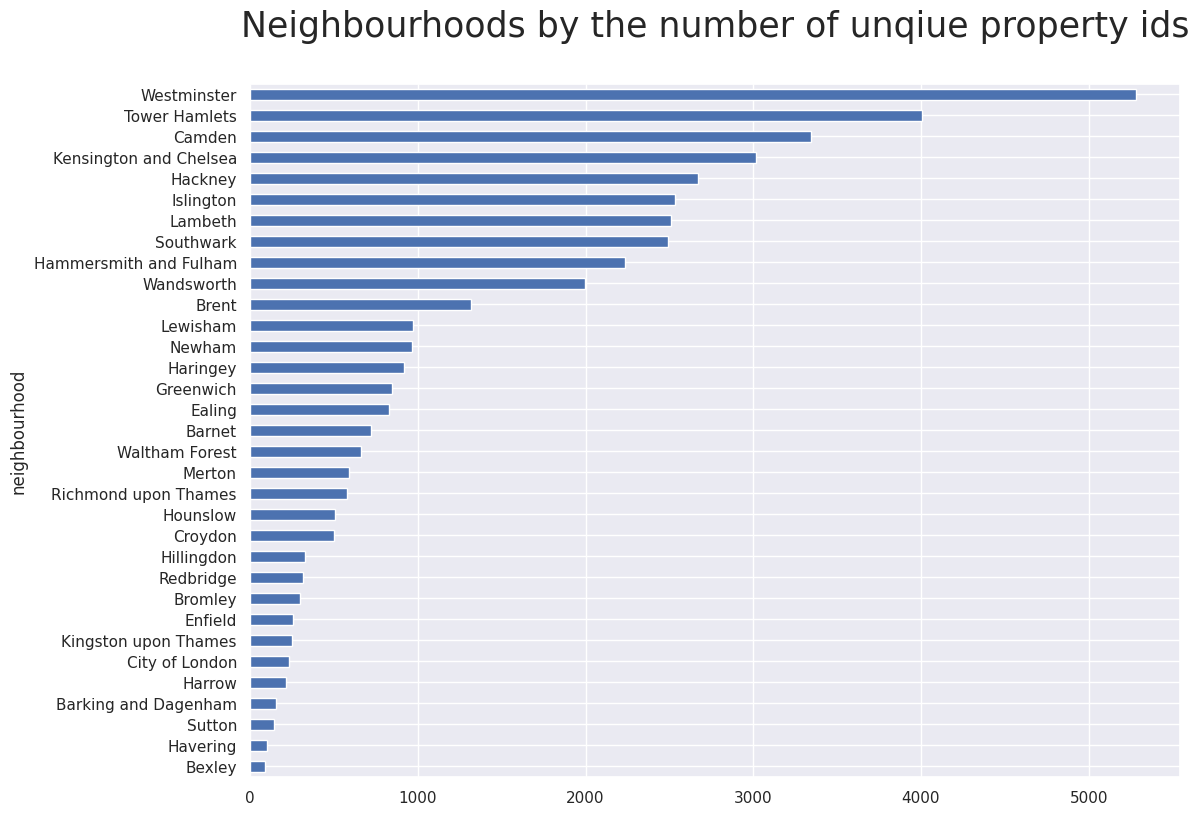

In [ ]:
grouped_by_neighbourhood = (data.groupby('neighbourhood').agg(num_of_ids = ('id','nunique')).sort_values(by='num_of_ids', ascending=False))

(grouped_by_neighbourhood
 .sort_values(by='num_of_ids')
 .plot(kind = 'barh', legend=False))

plt.title('Neighbourhoods by the number of unqiue property ids\n', fontsize = 25)
plt.show()

In [ ]:
print('Based on the number of unique object ids, the most active neighbourhoods are as follows (top 10): ')
i=1
for elem in grouped_by_neighbourhood.head(10).index:
  print(f"{i}. {elem}")
  i+=1

Based on the number of unique object ids, the most active neighbourhoods are as follows (top 10): 
1. Westminster
2. Tower Hamlets
3. Camden
4. Kensington and Chelsea
5. Hackney
6. Islington
7. Lambeth
8. Southwark
9. Hammersmith and Fulham
10. Wandsworth


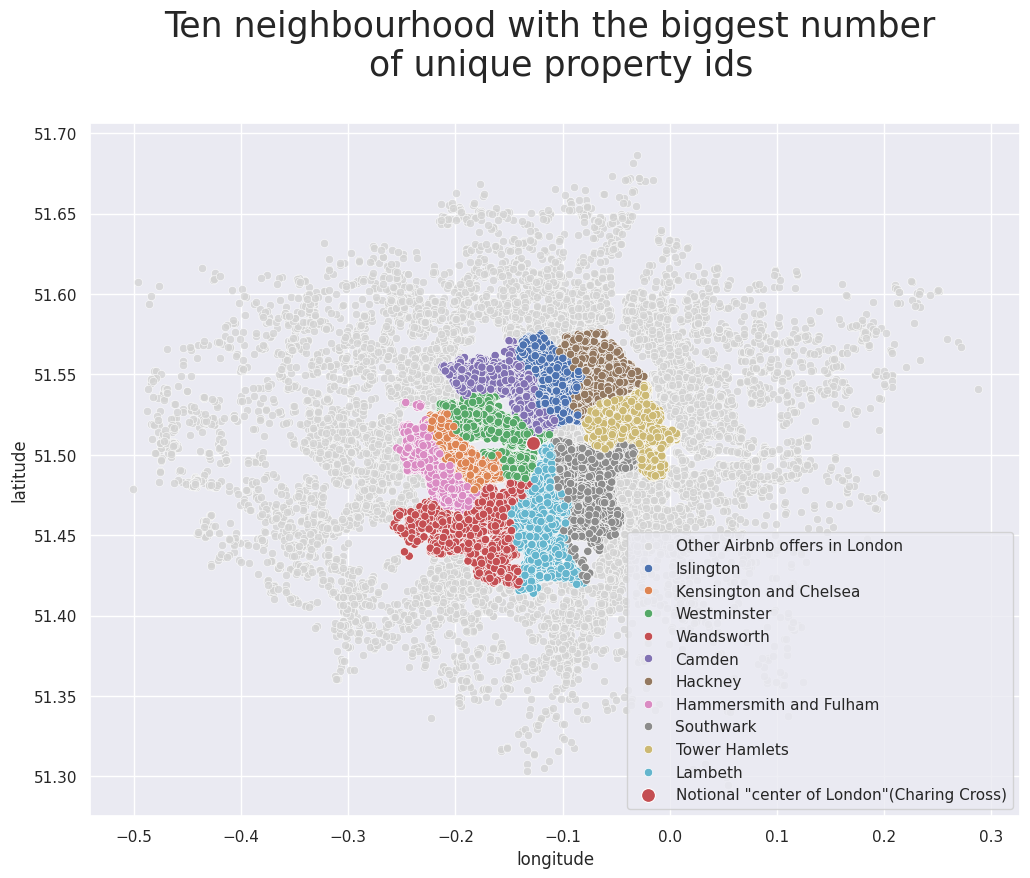

In [ ]:
sns.scatterplot(data = data, y ='latitude', x = 'longitude', alpha = 0.75, color = 'lightgrey', label = 'Other Airbnb offers in London')

sns.scatterplot(data = data.query("neighbourhood in @grouped_by_neighbourhood.head(10).index"), y='latitude', x='longitude', hue = 'neighbourhood')

sns.scatterplot(x=[-0.1277], y = [51.5075], s = 100, color = 'r', label = 'Notional "center of London"(Charing Cross)')

plt.title("Ten neighbourhood with the biggest number \n of unique property ids\n", fontsize = 25)
plt.show()

In [ ]:
neighborhood_by_price_top_10 = neighborhood_by_price[:10]
print(f'Based on the median price per offer, these are the most expensive areas of London (top 10):')
i = 1
for item in neighborhood_by_price_top_10:
  print(f'{i}. {item}')
  i+=1

Based on the median price per offer, these are the most expensive areas of London (top 10):
1. City of London
2. Kensington and Chelsea
3. Westminster
4. Camden
5. Hammersmith and Fulham
6. Islington
7. Wandsworth
8. Southwark
9. Hackney
10. Tower Hamlets


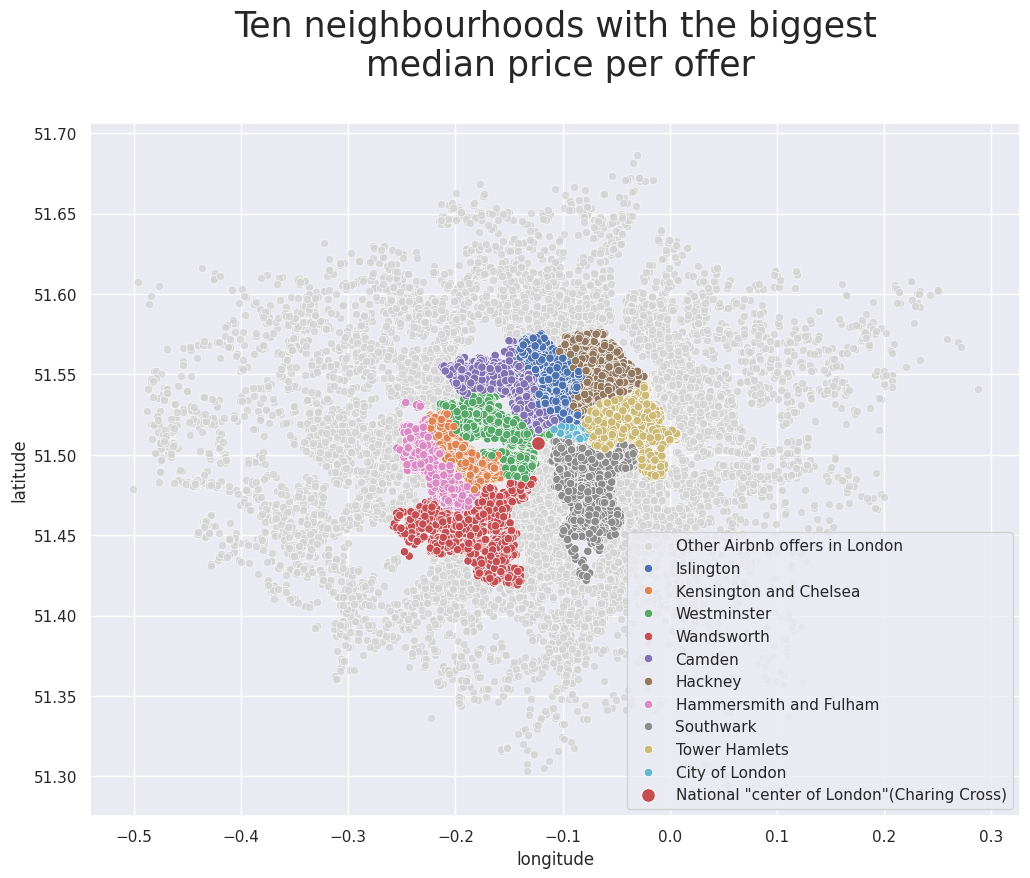

In [ ]:
sns.scatterplot(data = data , y= 'latitude', x='longitude', alpha = .75, color = 'lightgrey', label='Other Airbnb offers in London')
sns.scatterplot(data = data.query('neighbourhood in @neighborhood_by_price_top_10'), y='latitude', x ='longitude', hue = 'neighbourhood')

sns.scatterplot(x = [-0.1227], y=[51.5075], s=100, color='r', label='National "center of London"(Charing Cross)')
plt.title('Ten neighbourhoods with the biggest\n median price per offer\n', fontsize=25)
plt.show()

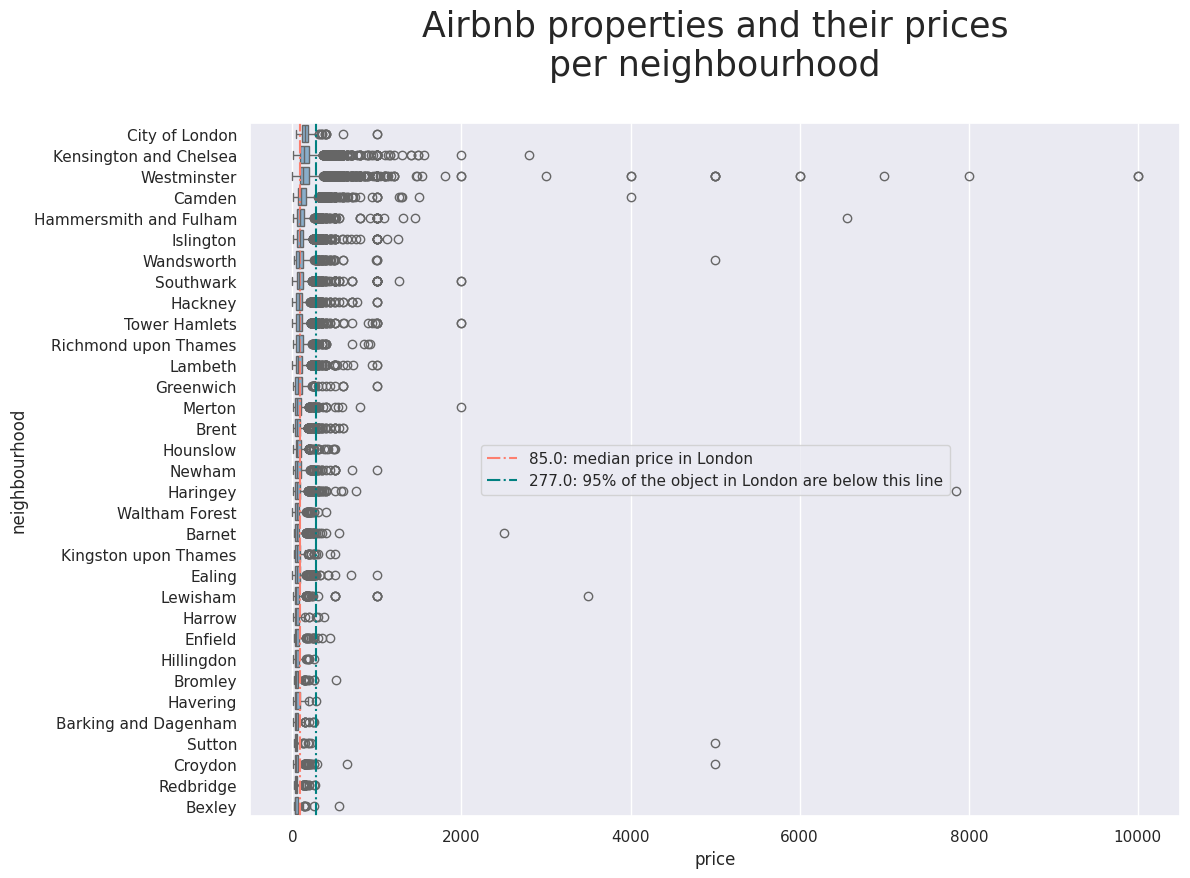

* Areas are ordered by the median price per offer.


In [ ]:
#Let us group our data by neighbourhoods and check the prices per property.

sns.boxplot(data=data, y='neighbourhood', x='price', orient = 'h', order=neighborhood_by_price, color = '#7eb0d5')
plt.axvline(x=data.price.median(), color = '#fd7f6f', linestyle='dashdot', label=f'{data.price.median()}: median price in London')
plt.axvline(x = data.price.quantile(.95), color = 'teal', linestyle = 'dashdot', label = f'{data.price.quantile(.95)}: 95% of the object in London are below this line')

plt.title('Airbnb properties and their prices\nper neighbourhood\n', fontsize=25)

plt.legend()

plt.show()
print('* Areas are ordered by the median price per offer.')

In [ ]:
#Calculating the percetile within the groupby table
def percentile(n):
  def percentile_(x):
    return np.percentile(x, n)
  percentile_.__name__ = 'percentile_%s' % n
  return percentile_

In [ ]:
(
    (
        round(data.groupby('neighbourhood')
        .agg(unique_id = ('id', 'nunique'),
        price_5percent = ('price', percentile(5)),
        min_price = ('price', 'min'),
        median_price = ('price', 'median'),
        price_95percent = ('price', percentile(95)),
        max_price = ('price', 'max')
        ).sort_values(by='median_price', ascending=False), 0)
        .style.background_gradient(axis = 'index')
    )
)

In [ ]:
data_raw = data

In [ ]:
for district in neighborhood_by_price:
    print(f'Working with prices in: {district}.')
    top_line = data.query('neighbourhood == @district')['price'].quantile(.95)
    bottom_line = data.query('neighbourhood == @district')['price'].quantile(.05)
    print(f'About 95% of objects are priced at more than {round(bottom_line, 0)} and no more than {round(top_line, 0)} (respectively).')
    data.loc[((data['neighbourhood'] == district) &
              ((data['price'] < bottom_line) |
               (data['price'] > top_line))),
             'price'] = np.nan
    print('Supercheap and ultra-expensive properties are wiped away.')
    print()
print(25*'_')
print()
print(f"Currently, there are {round((data.price.isna().sum() / len(data.price)) * 100, 2)}% of NaNs in 'price' column.")
print(f'By dropping lines with NaNs (the most expensive and cheapest properties), we are erasing {round((data.price.isna().sum() / len(data.price)) * 100, 2)}% of data.')
data = data.dropna(axis=0, subset=['price'])
print('\n-----> NaNs were dropped.')
print(f"Now, there are {round((data.price.isna().sum() / len(data.price)) * 100, 2)}% of NaNs in 'price' column.")

Working with prices in: City of London.
About 95% of objects are priced at more than 78.0 and no more than 313.0 (respectively).
Supercheap and ultra-expensive properties are wiped away.

Working with prices in: Kensington and Chelsea.
About 95% of objects are priced at more than 49.0 and no more than 400.0 (respectively).
Supercheap and ultra-expensive properties are wiped away.

Working with prices in: Westminster.
About 95% of objects are priced at more than 48.0 and no more than 433.0 (respectively).
Supercheap and ultra-expensive properties are wiped away.

Working with prices in: Camden.
About 95% of objects are priced at more than 37.0 and no more than 314.0 (respectively).
Supercheap and ultra-expensive properties are wiped away.

Working with prices in: Hammersmith and Fulham.
About 95% of objects are priced at more than 30.0 and no more than 275.0 (respectively).
Supercheap and ultra-expensive properties are wiped away.

Working with prices in: Islington.
About 95% of objects

In [ ]:
(data.groupby('neighbourhood').agg(min_price=('price', 'min'),
                                  median_price=('price', 'median'),
                                  mean_price=('price', 'mean'),
                                  max_price = ('price', 'max')
                                  ).sort_values(by='median_price', ascending=False)
                                  .style.background_gradient(axis=0)
)

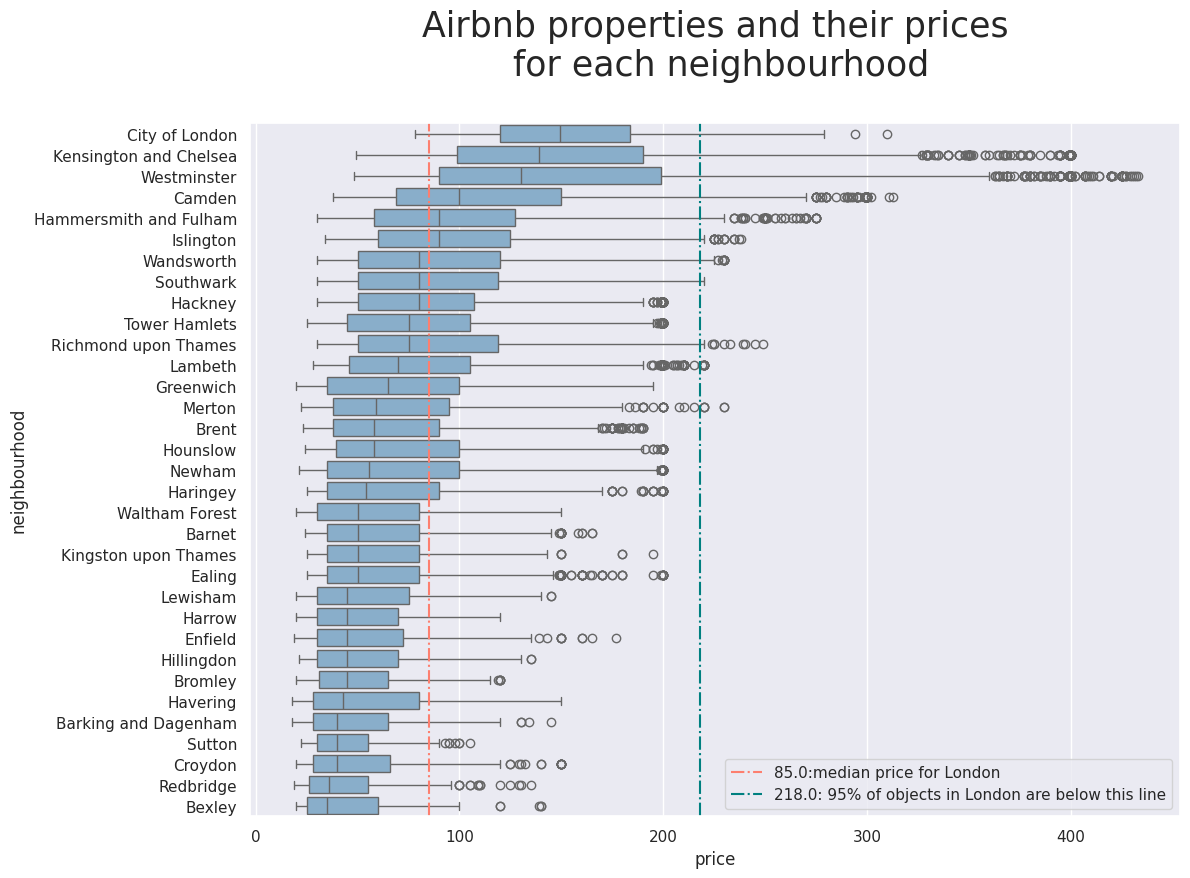

In [ ]:
sns.boxplot(y='neighbourhood', x='price', data=data, orient='h', order=neighborhood_by_price, color='#7eb0d5')
plt.axvline(x=data.price.median(), color='#fd7f6f', linestyle = 'dashdot', label=f'{data.price.median()}:median price for London')
plt.axvline(x=data.price.quantile(0.95), color='teal', linestyle ='dashdot', label = f'{data.price.quantile(0.95)}: 95% of objects in London are below this line')
plt.title('Airbnb properties and their prices\n for each neighbourhood\n', fontsize=25)
plt.legend()
plt.show()

Predicting the price: Decision Tree Regressor

In [ ]:
data.head()

id  host_id           neighbourhood  latitude  longitude  \
0  13913    54730               Islington  51.56802   -0.11121   
1  15400    60302  Kensington and Chelsea  51.48796   -0.16898   
2  17402    67564             Westminster  51.52098   -0.14002   
3  24328    41759              Wandsworth  51.47298   -0.16376   
4  25023   102813              Wandsworth  51.44687   -0.21874   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room   65.0               1                 16  2019-06-10   
1  Entire home/apt  100.0               3                 85  2019-05-05   
2  Entire home/apt  300.0               3                 41  2019-06-19   
3  Entire home/apt  175.0              30                 93  2019-06-08   
4  Entire home/apt   65.0               4                 28  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.15                               3               347   
1               0.73                               1               203   
2               0.41                              14               269   
3               0.88                               1               329   
4               0.69                               1                 2   

   room_type_category  neighbourhood_category  
0                   1                       5  
1                   0                       1  
2                   0                       2  
3                   0                       6  
4                   0                       6

In [ ]:
# This function is borrowed from kaggle's tutorial on machine learning.
# https://www.kaggle.com/learn/intro-to-machine-learning

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
  model.fit(train_X, train_y)
  preds_val = model.predict(val_X)
  mae = mean_absolute_error(val_y, preds_val)
  return (mae)

In [ ]:
# Function to apply DecisionTreeRegressor. See in-built prints for hints.
# It was inspired by kaggle's tutorial on machine learning:
# https://www.kaggle.com/learn/intro-to-machine-learning

def do_DecisionTreeRegressor(data, target_column, features_cols_list):
  print('Working on the DecisionTreeRegressor')
  print(f"Target column (y): {target_column}.")

  y=data[target_column]

  print('we are using features(X):')
  for elem in features_cols_list:
    print(f'- {elem}')
  X = data[features_cols_list]
  display(X.describe().T)

  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

  model = DecisionTreeRegressor(random_state=42)

  model.fit(train_X, train_y)

  candidate_max_leaf_nodes = [5,25,50,100,250,500]
  min_max_leaf_nodes = candidate_max_leaf_nodes[0]
  min_my_mae = get_mae(candidate_max_leaf_nodes[0], train_X, val_X, train_y, val_y)

  for item in candidate_max_leaf_nodes:
    my_mae = get_mae(item, train_X, val_X, train_y, val_y)
    if my_mae < min_my_mae:
      min_my_mae = my_mae
      min_max_leaf_nodes = item
  print()
  print(f'{min_max_leaf_nodes} leaf nodes were choosen (MAE : {round(my_mae, 2)})')

  model = DecisionTreeRegressor(random_state=42, max_leaf_nodes=min_max_leaf_nodes)
  model.fit(X, y)

  predictions = model.predict(X)
  print('Model is specified, fitted and returned.')
  print('Predictions are returned')
  return model, predictions

In [ ]:
features = [
    'latitude',
    'longitude',
    'room_type_category'
]

london_model_0, val_predictions = do_DecisionTreeRegressor(data=data, target_column='price', features_cols_list=features)

data.loc[:, 'coordinates_room'] = val_predictions
data.loc[:, 'coordinates_room'] = round(data.loc[:, 'coordinates_room'], 2)

Working on the DecisionTreeRegressor
Target column (y): price.
we are using features(X):
- latitude
- longitude
- room_type_category


count       mean       std       min       25%  \
latitude            37959.0  51.509273  0.044217  51.29930  51.48710   
longitude           37959.0  -0.130635  0.090682  -0.48786  -0.18864   
room_type_category  37959.0   0.410390  0.496230   0.00000   0.00000   

                         50%        75%       max  
latitude            51.51364  51.534565  51.68657  
longitude           -0.12826  -0.072470   0.28774  
room_type_category   0.00000   1.000000   2.00000


100 leaf nodes were choosen (MAE : 31.01)
Model is specified, fitted and returned.
Predictions are returned


In [ ]:
(
    (
    data.
    groupby('neighbourhood')
    .agg(median_price = ('price', 'median'),
         median_cordinate_price = ('coordinates_room', 'median'))
    .sort_values(by='median_price', ascending=False)
    .style.background_gradient(axis='columns')
    )
)

In [ ]:
data.head()

id  host_id           neighbourhood  latitude  longitude  \
0  13913    54730               Islington  51.56802   -0.11121   
1  15400    60302  Kensington and Chelsea  51.48796   -0.16898   
2  17402    67564             Westminster  51.52098   -0.14002   
3  24328    41759              Wandsworth  51.47298   -0.16376   
4  25023   102813              Wandsworth  51.44687   -0.21874   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room   65.0               1                 16  2019-06-10   
1  Entire home/apt  100.0               3                 85  2019-05-05   
2  Entire home/apt  300.0               3                 41  2019-06-19   
3  Entire home/apt  175.0              30                 93  2019-06-08   
4  Entire home/apt   65.0               4                 28  2019-06-22   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.15                               3               347   
1               0.73                               1               203   
2               0.41                              14               269   
3               0.88                               1               329   
4               0.69                               1                 2   

   room_type_category  neighbourhood_category  coordinates_room  
0                   1                       5             42.73  
1                   0                       1            132.36  
2                   0                       2            180.68  
3                   0                       6            137.02  
4                   0                       6            122.18

In [ ]:
features = ['room_type_category',
            'neighbourhood_category']

london_model_1, val_predictions = do_DecisionTreeRegressor(data=data, target_column='price', features_cols_list=features)

data.loc[:, 'room_neighbourhood'] = val_predictions
data.loc[:, 'room_neighbourhood'] = round(data.loc[:,'room_neighbourhood'], 2)

Working on the DecisionTreeRegressor
Target column (y): price.
we are using features(X):
- room_type_category
- neighbourhood_category


count      mean       std  min  25%  50%   75%   max
room_type_category      37959.0  0.410390  0.496230  0.0  0.0  0.0   1.0   2.0
neighbourhood_category  37959.0  8.989857  7.222045  0.0  3.0  7.0  12.0  32.0


50 leaf nodes were choosen (MAE : 30.97)
Model is specified, fitted and returned.
Predictions are returned


In [ ]:
(
    round(
        data.groupby('neighbourhood')
        .agg(median_price=('price', 'median'),
             median_cordinate_room = ('coordinates_room', 'median'),
             median_room_neighbourhood = ('room_neighbourhood', 'median')
             ).sort_values(by='median_price', ascending=False),0)
            .style.background_gradient(axis='columns')
            )

In [ ]:
london_model_1, val_predictions = do_DecisionTreeRegressor(data=data, target_column='price',
                                                           features_cols_list=[
                                                               'room_type_category',
                                                               'neighbourhood_category',
                                                               'latitude',
                                                               'longitude'
                                                           ])
data.loc[:,'neighb_room_coords'] = val_predictions
data.loc[:,'neighb_room_coords'] = round(data.loc[:,'neighb_room_coords'],2)

Working on the DecisionTreeRegressor
Target column (y): price.
we are using features(X):
- room_type_category
- neighbourhood_category
- latitude
- longitude


count       mean       std       min       25%  \
room_type_category      37959.0   0.410390  0.496230   0.00000   0.00000   
neighbourhood_category  37959.0   8.989857  7.222045   0.00000   3.00000   
latitude                37959.0  51.509273  0.044217  51.29930  51.48710   
longitude               37959.0  -0.130635  0.090682  -0.48786  -0.18864   

                             50%        75%       max  
room_type_category       0.00000   1.000000   2.00000  
neighbourhood_category   7.00000  12.000000  32.00000  
latitude                51.51364  51.534565  51.68657  
longitude               -0.12826  -0.072470   0.28774


100 leaf nodes were choosen (MAE : 31.01)
Model is specified, fitted and returned.
Predictions are returned


In [ ]:
(
    round(
        data.groupby('neighbourhood')
        .agg(median_price=('price', 'median'),
             median_cordinate_room = ('coordinates_room', 'median'),
             median_room_neighbourhood = ('room_neighbourhood', 'median'),
             median_neighb_room_coords = ('neighb_room_coords', 'median')
             ).sort_values(by='median_price', ascending=False),0)
            .style.background_gradient(axis='columns')
            )

#Cluster Airbnb offers: KMeans

In [ ]:
#let us cluster Airbnb offers based on:
#their price
#geographical coordinates(longitude, latitude)
#property types(room, whole flat)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting columns our clusterisation will be based upon.
X = data[['neighbourhood_category', 'room_type_category', 'latitude', 'longitude']]
# Data standardisation before working with algorithms
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# set the number of clusters to 5 and fix the random_state value for reproducible results
km = KMeans(n_clusters=5, random_state=42)

# applying the algorithm to the data
labels = km.fit_predict(X_sc)


# saving clusters as a column
data['cluster'] = labels

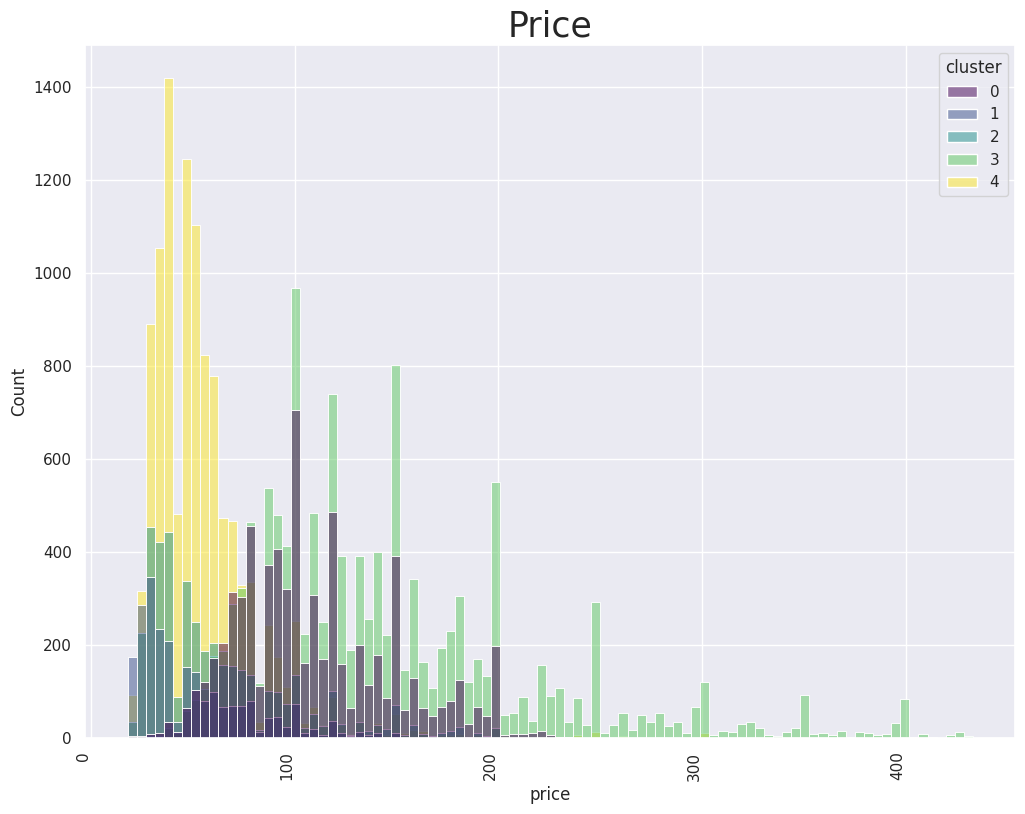

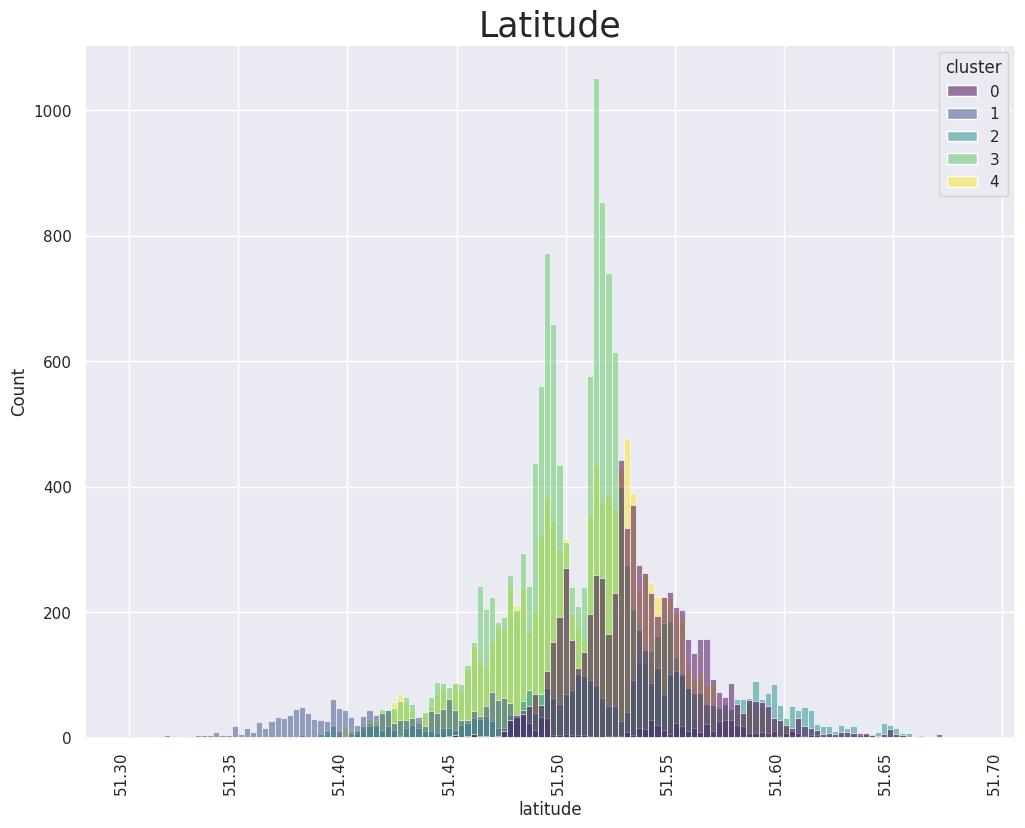

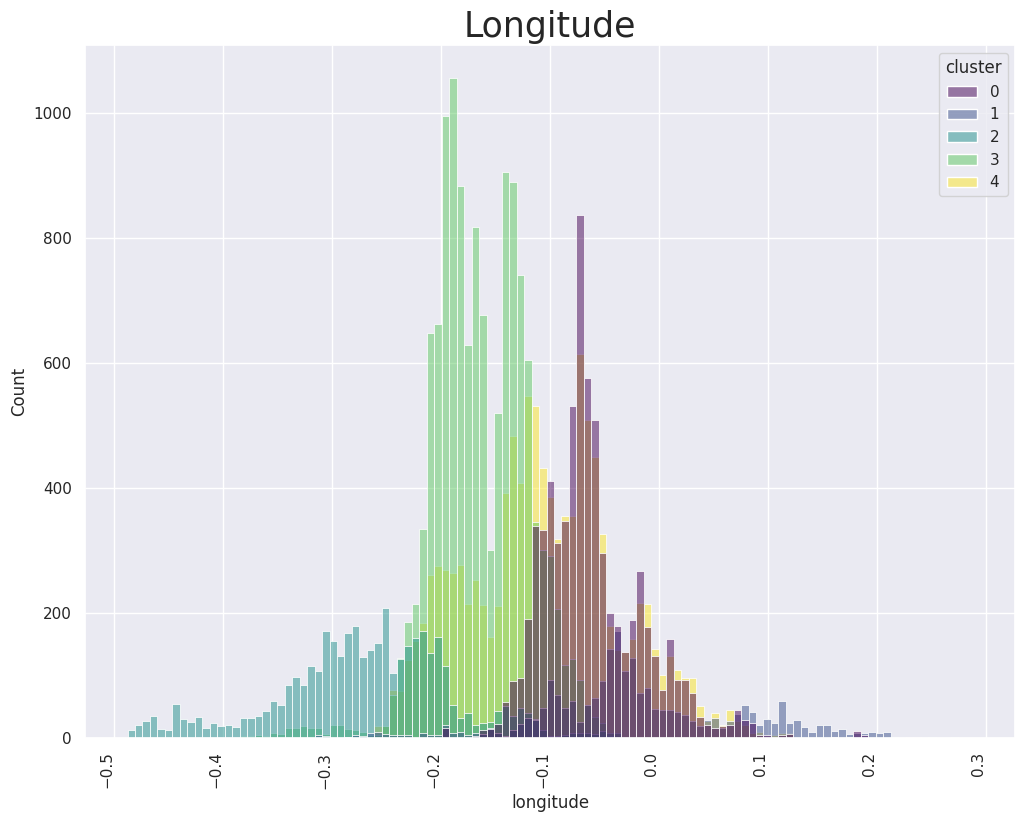

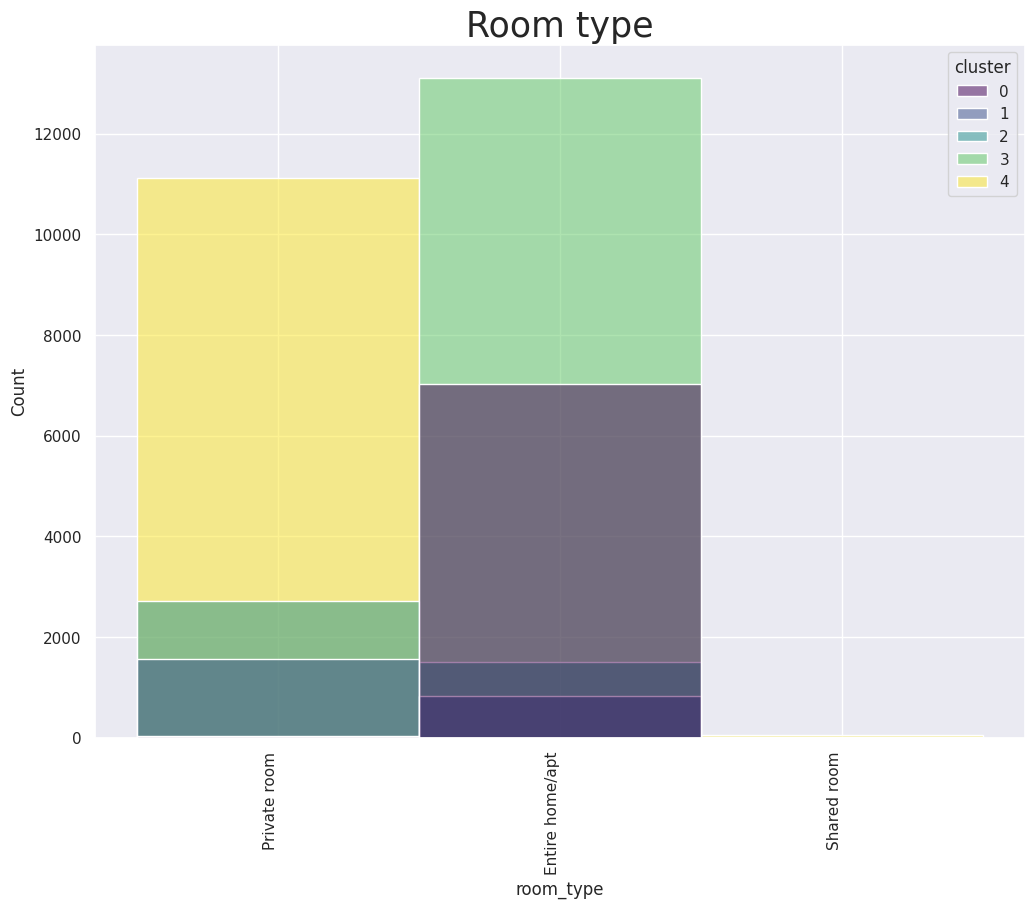

In [ ]:
for col in data[['price', 'latitude', 'longitude', 'room_type']].columns:
  sns.histplot(data=data, x=col, hue='cluster', palette='viridis')
  plt.xticks(rotation=90, ha='right')
  plt.title(f'{col.capitalize().replace("_", " ")}', fontsize = 25)
  plt.show()


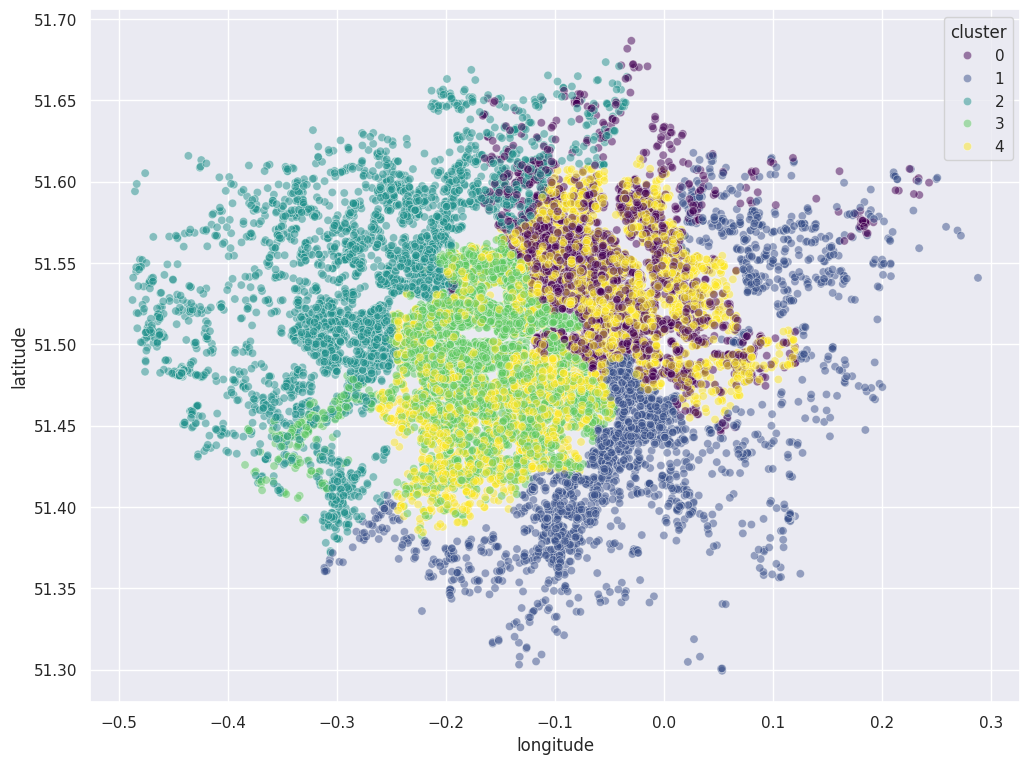

In [ ]:
sns.scatterplot(data=data, y='latitude', x='longitude', hue='cluster', alpha=.5, palette='viridis')
plt.show()

In [ ]:
for cluster in range(5):
  i = 1
  print(f'Neighbourhoods in cluster {cluster}: ')
  for elem in (data.query(f'cluster == {cluster}')['neighbourhood'].unique()):
    print(f'{i}.{elem}')
    i+=1
  print(25*'_', '\n')

Neighbourhoods in cluster 0: 
1.Islington
2.Hackney
3.Tower Hamlets
4.Haringey
5.Lambeth
6.Newham
7.Greenwich
8.Southwark
9.Waltham Forest
10.Redbridge
11.Barnet
12.Camden
13.Enfield
14.Brent
15.Havering
16.Barking and Dagenham
_________________________ 

Neighbourhoods in cluster 1: 
1.Lewisham
2.Croydon
3.Barking and Dagenham
4.Bromley
5.Newham
6.Redbridge
7.Greenwich
8.Havering
9.Bexley
10.Sutton
11.Kingston upon Thames
12.Merton
_________________________ 

Neighbourhoods in cluster 2: 
1.Barnet
2.Hounslow
3.Haringey
4.Brent
5.Enfield
6.Ealing
7.Richmond upon Thames
8.Harrow
9.Hillingdon
10.Kingston upon Thames
_________________________ 

Neighbourhoods in cluster 3: 
1.Kensington and Chelsea
2.Westminster
3.Wandsworth
4.Richmond upon Thames
5.Hammersmith and Fulham
6.Southwark
7.Camden
8.Lambeth
9.Merton
10.City of London
11.Islington
12.Brent
_________________________ 

Neighbourhoods in cluster 4: 
1.Islington
2.Newham
3.Camden
4.Hammersmith and Fulham
5.Southwark
6.Hackney
7.Wes

In [ ]:
i = 1
not_0 = set(data.query('cluster != 0')['neighbourhood'].to_list())
is_0 = set(data.query('cluster == 0')['neighbourhood'].to_list())
in_0_and_1_or_2 = set(not_0).intersection(is_0)
print('Neighbourhoods in cluster 0 that are listed for another cluster:')
for elem in in_0_and_1_or_2:
    print(f'{i}. {elem}')
    i += 1

Neighbourhoods in cluster 0 that are listed for another cluster:
1. Barking and Dagenham
2. Greenwich
3. Brent
4. Tower Hamlets
5. Barnet
6. Enfield
7. Hackney
8. Camden
9. Havering
10. Haringey
11. Southwark
12. Newham
13. Lambeth
14. Waltham Forest
15. Islington
16. Redbridge


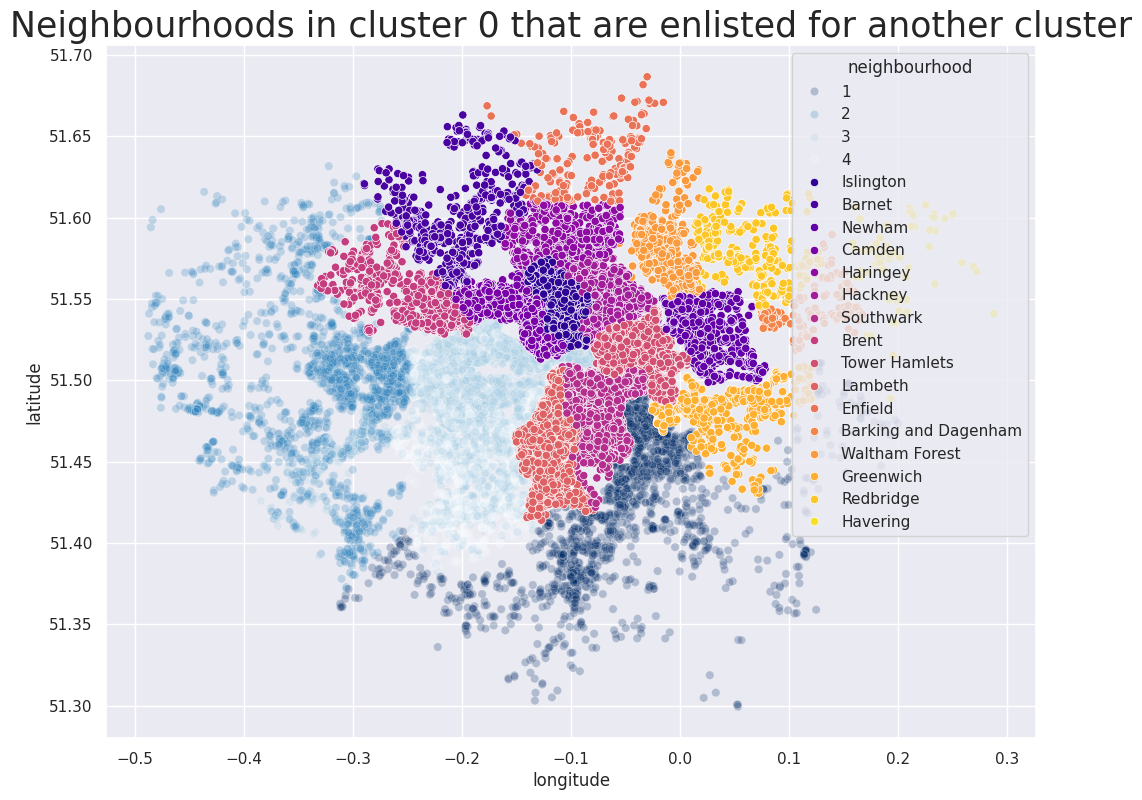

In [ ]:
sns.scatterplot(data=data.query('neighbourhood not in @in_0_and_1_or_2'), y='latitude', x='longitude', hue='cluster', palette='Blues_r', alpha=.25)
sns.scatterplot(data=data.query('neighbourhood in @in_0_and_1_or_2'), y='latitude', x='longitude', hue='neighbourhood', palette='plasma')
plt.title('Neighbourhoods in cluster 0 that are enlisted for another cluster', fontsize=25)
plt.show()

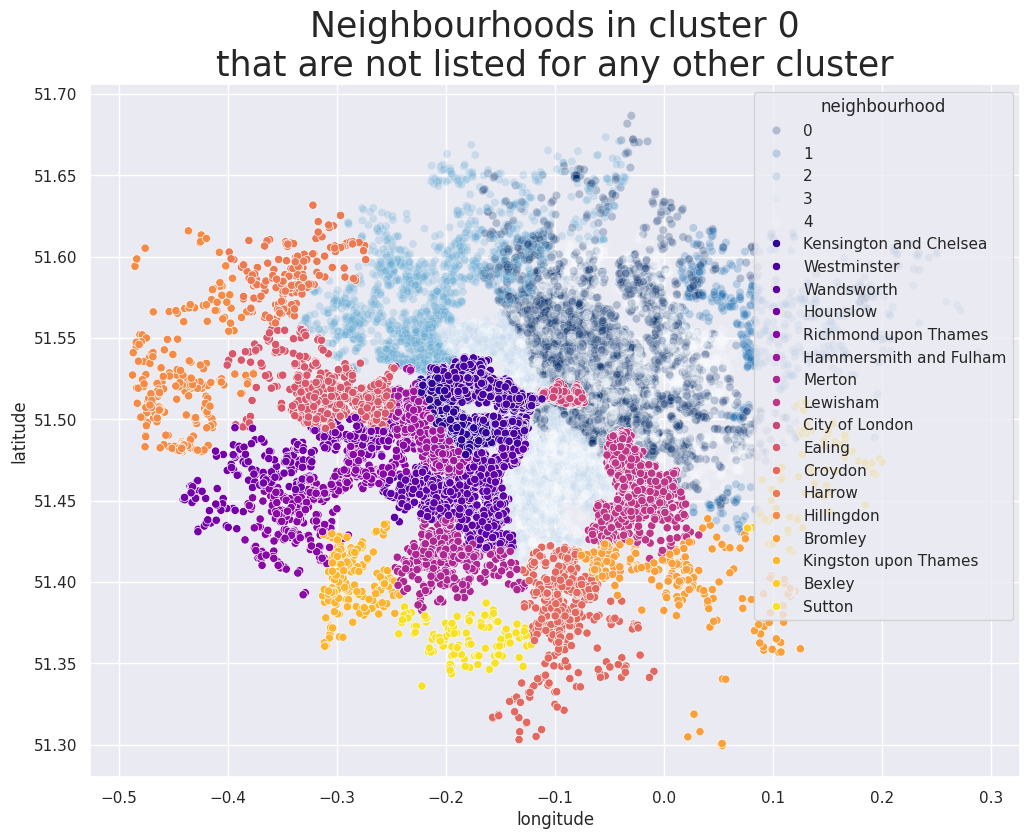

In [ ]:
sns.scatterplot(data=data, y='latitude', x='longitude', hue='cluster', palette='Blues_r', alpha=.25)
sns.scatterplot(data=data.query('neighbourhood not in @in_0_and_1_or_2'), y='latitude', x='longitude', hue='neighbourhood', palette='plasma')
plt.title('Neighbourhoods in cluster 0\nthat are not listed for any other cluster', fontsize=25)
plt.show()

In [ ]:
(
    (round(
        data
        .groupby('cluster')
        .agg(unique_ids=('id', 'nunique'),
             median_room_type=('room_type_category', 'median'),
            price_5percent=('price', percentile(5)),
             min_price=('price', 'min'),
            median_price=('price', 'median'),
             price_95percent=('price', percentile(95)),
             max_price=('price', 'max')
    ).sort_values(by='median_price', ascending=False), 0)
    .style.background_gradient(axis='index')
    )
)